# Carrefour Kenya Analysis

## Business Understanding

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.


## Specifying the question
Part 1: Dimensionality Reduction

Reduce the dataset to a low dimensional dataset using the t-SNE algorithm or PCA. Perform analysis and provide insights gained from your analysis. Data to use is http://bit.ly/CarreFourDataset

Part 2: Feature Selection

Perform feature selection through the use of the unsupervised learning methods learned earlier this week. Perform analysis and provide insights on the features that contribute the most information to the dataset. Data to use is http://bit.ly/CarreFourDataset


## Metric for success
Dataset with reduced dimensions.


## Recording the experimental design
Problem Definition

Data Sourcing

Check the Data

Perform Data Cleaning

Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)

Implement the Solution

Challenge the Solution

Follow up Questions

In [1]:
## Installing packages

install.packages("dplyr")
library(dplyr)
install.packages("Rtsne")
library(Rtsne)
install.packages("caret")
library(caret)
install.packages("corrplot")
library(corrplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘ModelMetrics’, ‘recipes’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: lattice

Loading required package: ggplot2

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.84 loaded



In [2]:
# loading the dataset
df <- read.csv("Supermarket_Dataset_1 - Sales Data.csv")

In [3]:
# reading the first 6 rows of our dataset
head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [4]:
# Checking for the summary description of our data

summary(df)

       Invoice.ID  Branch  Customer.type    Gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 Product.line   Unit.price       Quantity          Tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

In [5]:
# Checking the structure of our dataset

str(df)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

In [6]:
### Concatenate the columns data and time
 
df$Date_time = paste(df$Date,df$Time)

# Converting the column into string
df$Date_time = as.character(df$Date_time)


In [7]:
# converting the Date_time column data type to date time

df$Date_time = strptime(df$Date_time, "%m/%d/%Y %M:%S")


In [8]:
# checking if the data type has been converted

str(df$Date_time)

 POSIXlt[1:1000], format: "2019-01-05 00:13:08" "2019-03-08 00:10:29" "2019-03-03 00:13:23" ...


## Data Cleaning

In [9]:
# Checking for Missing Values

colSums(is.na(df))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total               Date_time 
                      0                       0

There are no missing values. 

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



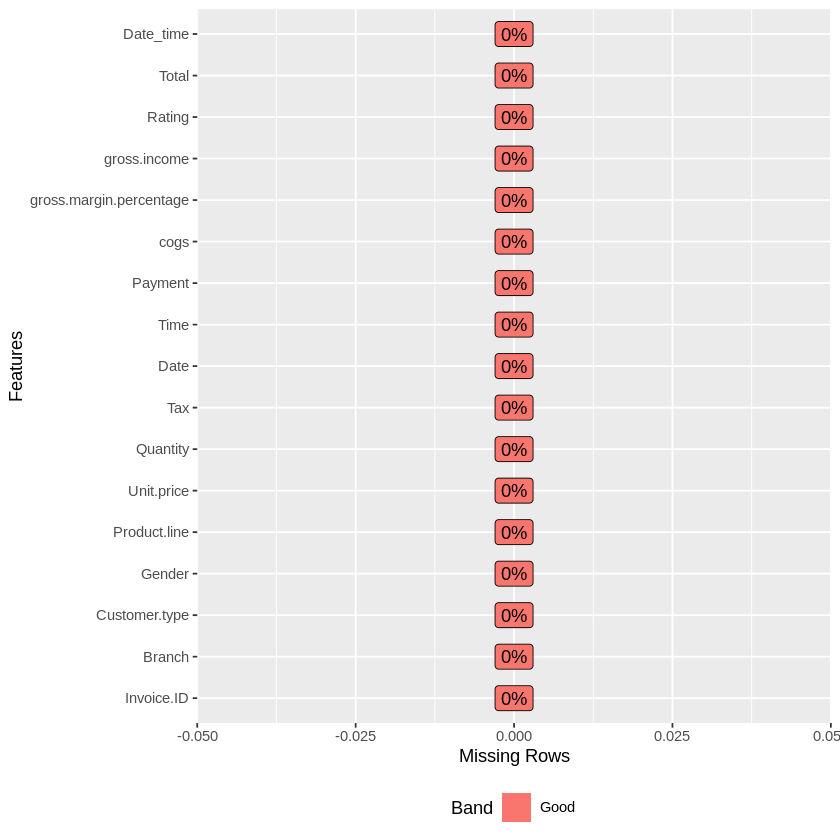

In [10]:
# Plotting the missing values

install.packages("DataExplorer")
library(DataExplorer)
df$Date_time <- as.POSIXct(df$Date_time)
plot_missing(df)

In [11]:

# Checking for duplicated data

duplicates <- df[duplicated(df),]

#duplicates

anyDuplicated(df)

[1] 0

We dont have any duplicated data.

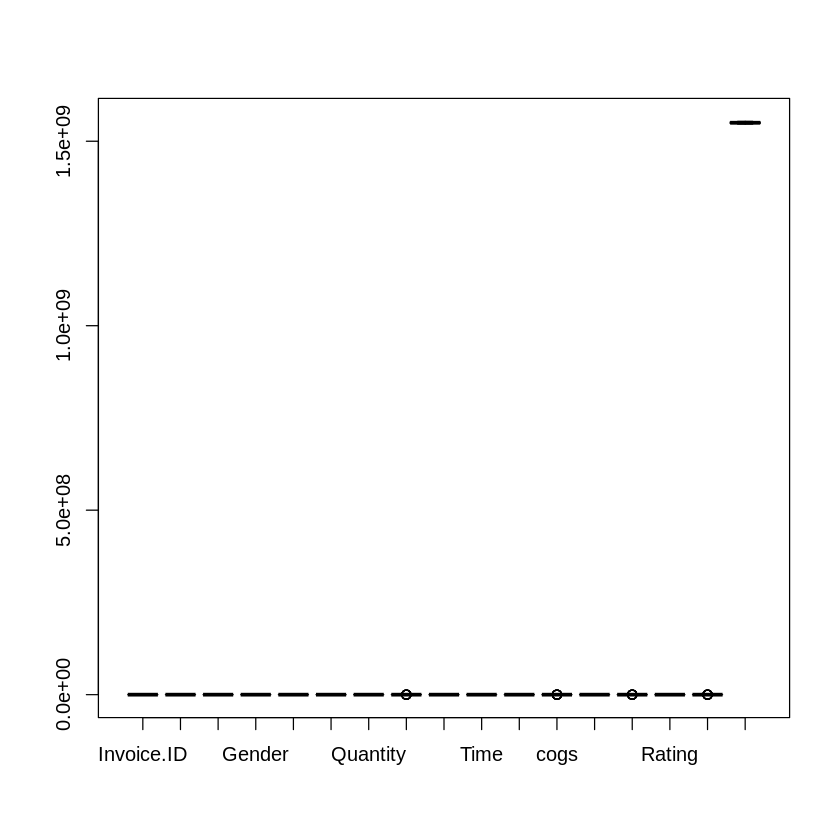

In [12]:
# Plot a boxplot to help us visualise any existing outliers 

boxplot(df)

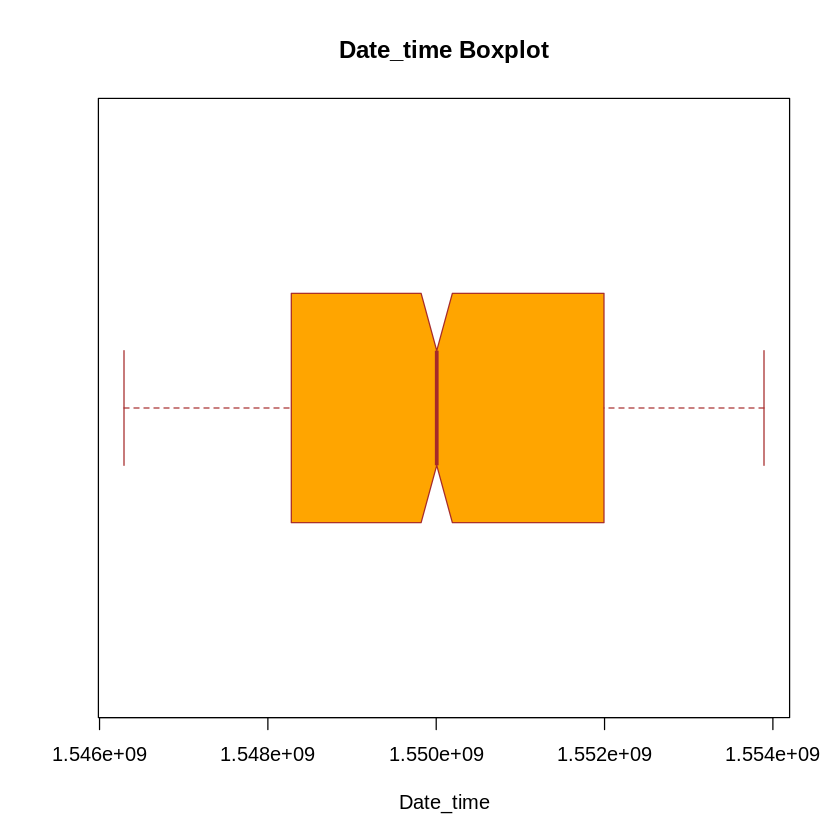

In [13]:
# plotting a boxplot for the date outliers

boxplot(df$Date_time,
main = "Date_time Boxplot",
xlab = "Date_time",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

In [14]:
# Dropping unnecessary column 

df <- df[,c(-1,-9,-10,-13)]
head(df)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Date_time
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,26.1415,9.1,548.9715,2019-01-05 00:13:08
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,3.8200,9.6,80.2200,2019-03-08 00:10:29
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,16.2155,7.4,340.5255,2019-03-03 00:13:23
4,A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,23.2880,8.4,489.0480,2019-01-27 00:20:33
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,30.2085,5.3,634.3785,2019-02-08 00:10:37
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,29.8865,4.1,627.6165,2019-03-25 00:18:30


# EDA

## Univariate Analysis

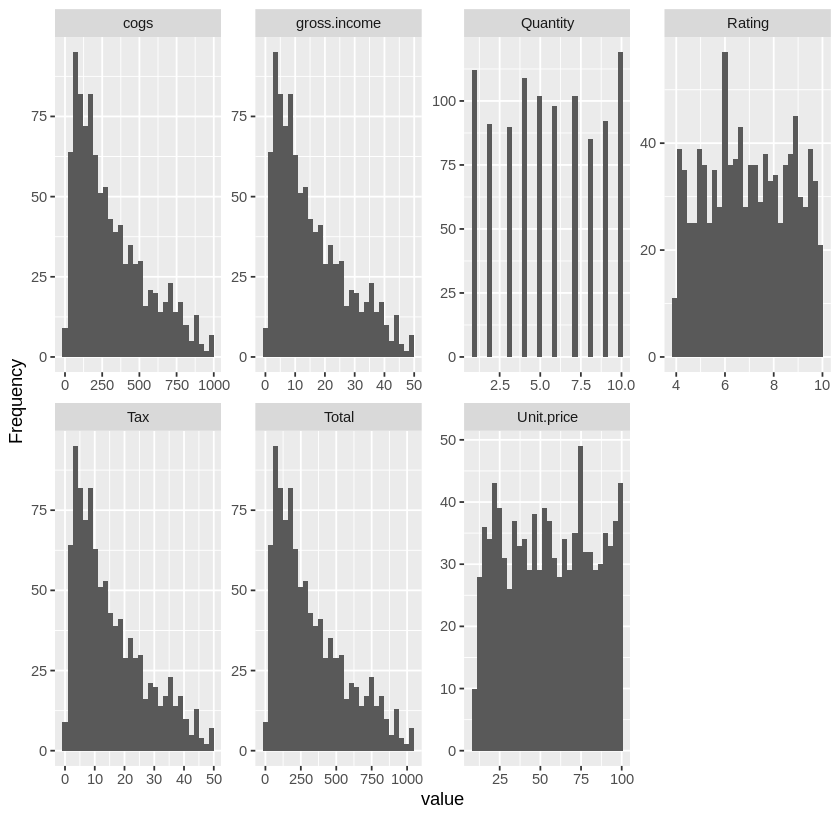

In [15]:
# Plotting all histograms in the continuous variables in our data 
  
  plot_histogram(df)

In [16]:
# Bar plots of the categorical/factor modes variables
# par(mfrow=c(4,1))
# for(i in 11:16) {
# 	counts <- table(unique_cust[,i])
# 	name <- names(unique_cust)[i]
# 	barplot(counts, main=name, col = heat.colors(20))}

In [17]:
# Selecting the numerical data 
 
numericals <- df[,c(5,6,7,9:12)]
head(numericals)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,29.8865,4.1,627.6165


In [18]:
unique(df$gross.margin.percentage)

NULL

In [19]:
# We then pass df to the prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary
# ---
# 
df.pca <- prcomp(df[,c(5,6,7,9:12)], center = TRUE, scale. = TRUE)
summary(df.pca)


Importance of components:
                          PC1    PC2    PC3     PC4       PC5       PC6
Standard deviation     2.2185 1.0002 0.9939 0.30001 3.132e-16 1.457e-16
Proportion of Variance 0.7031 0.1429 0.1411 0.01286 0.000e+00 0.000e+00
Cumulative Proportion  0.7031 0.8460 0.9871 1.00000 1.000e+00 1.000e+00
                             PC7
Standard deviation     3.219e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

We obtain 7 principal components,which explain a percentate of the total variation of the dataset.
PC1 explains 70% of the total variance, which means that more than two-thirds 
of the information in the dataset (7 variables) can be encapsulated 
by just that one Principal Component. 

In [20]:
str(df.pca)

List of 5
 $ sdev    : num [1:7] 2.22 1.00 9.94e-01 3.00e-01 3.13e-16 ...
 $ rotation: num [1:7, 1:7] -0.292 -0.325 -0.45 -0.45 -0.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:7] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:7] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:7] -2.005 2.306 -0.186 -1.504 -2.8 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


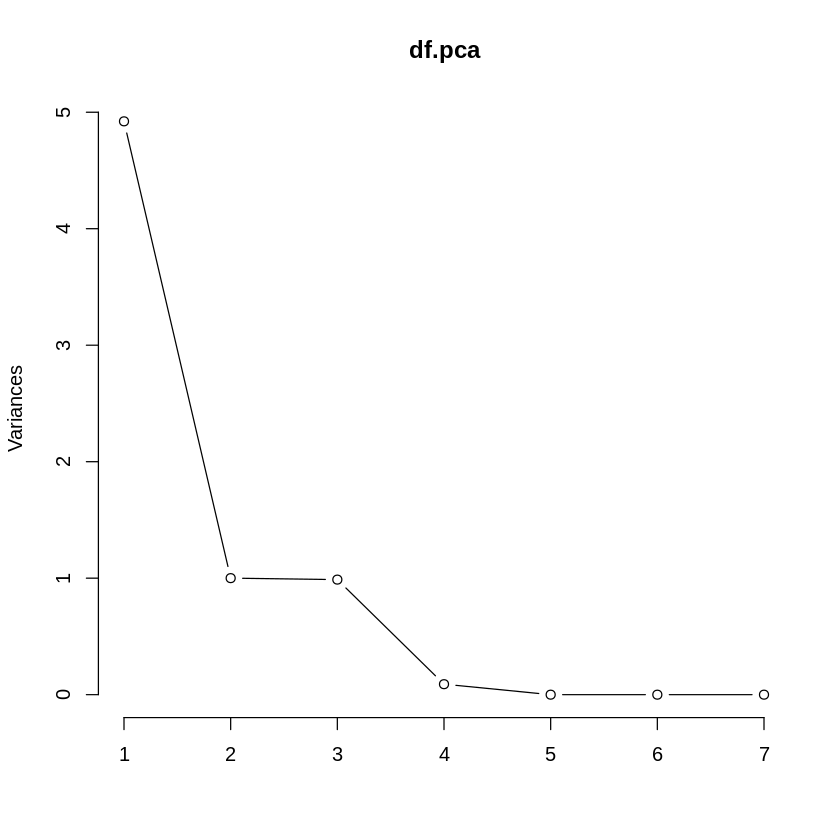

In [21]:
plot(df.pca, type="l")


we can see that pca 1 explains most of our total variances. pca 2 and 3 explain 14% of our total variances each.

In [22]:
# We will now plot our pca.

# Installing our ggbiplot visualisation package
# 
install.packages("devtools",dependencies=TRUE)
library(devtools)
install_github("vqv/ggbiplot", force = TRUE)
library(ggbiplot)
ggbiplot(df.pca)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: usethis


Warning message in system(cmd):
“error in running command”
Warning message in utils::untar(tarfile, ...):
“‘/bin/gtar -xf '/tmp/RtmpXAjca2/file4136ed5d89d.tar.gz' -C '/tmp/RtmpXAjca2/remotes41367520573e'’ returned error code 127”


ERROR: Error: Failed to install 'ggbiplot' from GitHub:
  error in running command


We will now go ahead and compare our PCA results to tSNE.

In [23]:
# # Executing the algorithm on curated data

tsne <- Rtsne(numericals, dims =2, perplexity = 30, verbosity = TRUE,
      max_iter = 500)

# getting the time it takes to execute

exeTimeTsne <- system.time(Rtsne(numericals, dims = 2, perplexity = 30,
verbose = TRUE, max_iter = 500))

Performing PCA
Read the 1000 x 7 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.10 seconds (sparsity = 0.101258)!
Learning embedding...
Iteration 50: error is 58.282930 (50 iterations in 0.20 seconds)
Iteration 100: error is 51.409103 (50 iterations in 0.18 seconds)
Iteration 150: error is 50.243002 (50 iterations in 0.13 seconds)
Iteration 200: error is 49.760909 (50 iterations in 0.14 seconds)
Iteration 250: error is 49.548535 (50 iterations in 0.14 seconds)
Iteration 300: error is 0.567438 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.401304 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.355879 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.339847 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.329051 (50 iterations in 0.13 seconds)
Fitting performed in 1.45 seconds.


In [24]:
# Curating the database for analysis 
# 
labels <- df$Product.line
df$Product.line<-as.factor(df$product.line)

# For plotting
#
colors = rainbow(length(df$Product.line))
names(colors) = unique(df$Product.line)
# Plotting our graph and closely examining the graph

plot(tsne$Y, t = 'n', main = "tnse")
text(tsne$Y, labels =df$Product.line, col = "magenta")


ERROR: Error in `$<-.data.frame`(`*tmp*`, Product.line, value = structure(integer(0), .Label = character(0), class = "factor")): replacement has 0 rows, data has 1000


## Feature Selection

In [27]:
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(numericals)

In [28]:
# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

In [29]:
# Highly correlated attributes
# ---
# 
highlyCorrelated

names(numericals[,highlyCorrelated])

[1] 4 7 3

[1] "cogs"  "Total" "Tax"

In [30]:
# Removing Redundant Features 
# ---
# 
drop <-numericals[-highlyCorrelated]